In [52]:
import pandas as pd
import numpy as np
import urllib
import scipy.optimize
import random
import urllib.request
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
#here we get the data
df = pd.read_csv('occupancy.csv',
                sep=r'\s*,\s*',engine = 'python', na_values = '?')
df.drop(df.columns[[0, 1]], axis=1, inplace=True)
df.dropna()
X_Y_chart = pd.get_dummies(df, drop_first=True)
print(df.shape)
print(X_Y_chart.shape)
X_and_Y = X_Y_chart.values
np.random.shuffle(X_and_Y) 
X = X_and_Y[:, 0:-1]
Y = X_and_Y[:, -1] 
print(X.shape, Y.shape)
X_train_val = X[:int(0.8*len(X))]
X_test = X[int(0.8*len(X)):]
Y_train_val = Y[:int(0.8*len(Y))]
Y_test = Y[int(0.8*len(Y)):]
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(9752, 6)
(9752, 6)
(9752, 5) (9752,)
(7801, 5) (1951, 5) (7801,) (1951,)


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
def draw_heatmap(acc, acc_desc, k_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=[]) 
    ax.collections[0].colorbar.set_label("accuracy") 
    ax.set(ylabel='$params$')
    plt.title(acc_desc) 
    sns.set_style("whitegrid", {'axes.grid' : False}) 
    plt.show()

# 80/20 Split

1

 RANDOM FOREST CLASSIFIER
[0.99141136 0.99410332 0.9943597  0.9943597  0.99423151]


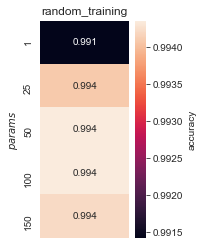

random test accuracy with 50 is: 0.9964120963608406

 ADABOOST CLASSIFIER WITH DECISION TREE
[0.99141136 0.99102679 0.99077041 0.99115498 0.99179592]


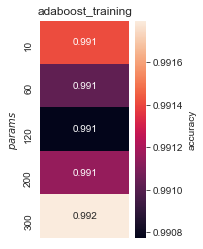

Adaboost test accuracy with 300 is: 0.9923116350589442

 GRADIENT BOOSTING CLASSIFIER
[0.99294962 0.99294962 0.99359057 0.99346238 0.99333419]


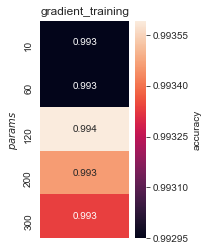

Gradient test accuracy with 120 is: 0.9933367503844183

 BAGGING CLASSIFIER WITH KNEIGHBORS CLASSIFIER
max_samples: [0.99269324 0.99294962 0.993206   0.99307781 0.99333419]


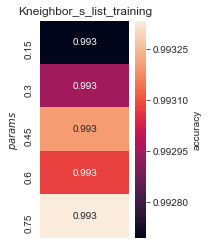

max_features: [0.9218049  0.97320856 0.98051532 0.99025766 0.99384694]


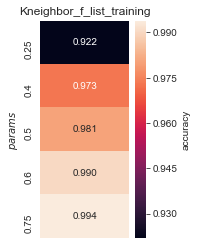

Kneighbor Bagging test accuracy with 0.75 and 0.75 is: 0.9948744233726294

 BAGGING CLASSIFIER WITH DECISION TREE
max_samples: [0.99269324 0.993206   0.99346238 0.99371875 0.99294962]


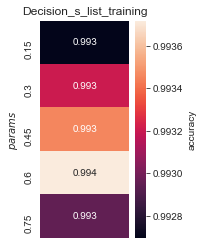

max_features: [0.90847327 0.98807845 0.99051404 0.99371875 0.98948853]


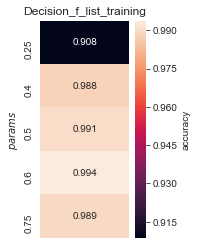

Decision Bagging test accuracy with 0.6 and 0.6 is: 0.9943618657098924




2

 RANDOM FOREST CLASSIFIER
[0.98948853 0.99333419 0.99359057 0.99410332 0.99410332]


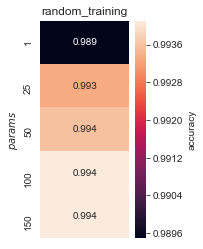

random test accuracy with 100 is: 0.9933367503844183

 ADABOOST CLASSIFIER WITH DECISION TREE
[0.99064223 0.9908986  0.99012947 0.99051404 0.99038585]


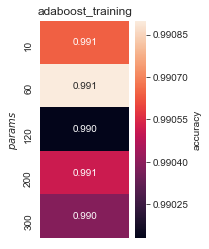

Adaboost test accuracy with 60 is: 0.990773962070733

 GRADIENT BOOSTING CLASSIFIER
[0.99371875 0.99359057 0.99346238 0.99371875 0.99371875]


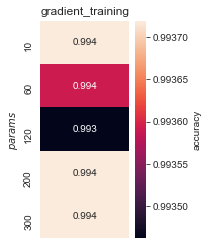

Gradient test accuracy with 10 is: 0.99128651973347

 BAGGING CLASSIFIER WITH KNEIGHBORS CLASSIFIER
max_samples: [0.99307781 0.99346238 0.99346238 0.99333419 0.99346238]


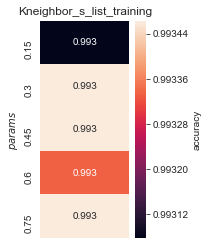

max_features: [0.91308807 0.98051532 0.98551468 0.99333419 0.99384694]


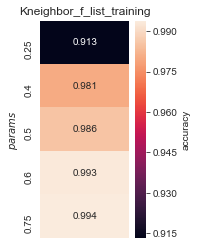

Kneighbor Bagging test accuracy with 0.3 and 0.75 is: 0.9938493080471553

 BAGGING CLASSIFIER WITH DECISION TREE
max_samples: [0.99294962 0.99397513 0.99333419 0.99307781 0.99256506]


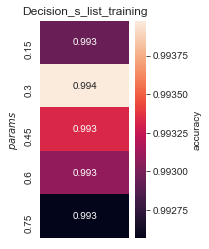

max_features: [0.91513908 0.99333419 0.98551468 0.99282143 0.99102679]


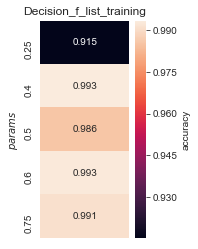

Decision Bagging test accuracy with 0.3 and 0.4 is: 0.9810353664787289




3

 RANDOM FOREST CLASSIFIER
[0.99038585 0.99397513 0.99359057 0.99410332 0.99397513]


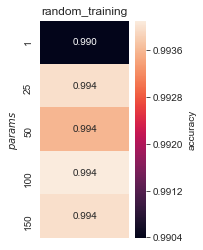

random test accuracy with 100 is: 0.9923116350589442

 ADABOOST CLASSIFIER WITH DECISION TREE
[0.99115498 0.9920523  0.99153955 0.9920523  0.99128317]


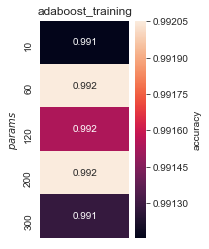

Adaboost test accuracy with 60 is: 0.990773962070733

 GRADIENT BOOSTING CLASSIFIER
[0.99384694 0.99307781 0.99294962 0.99230868 0.99282143]


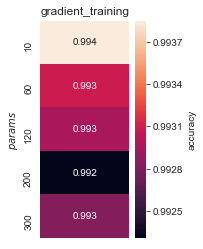

Gradient test accuracy with 10 is: 0.990773962070733

 BAGGING CLASSIFIER WITH KNEIGHBORS CLASSIFIER
max_samples: [0.99384694 0.99397513 0.99423151 0.99423151 0.99397513]


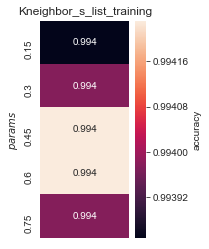

max_features: [0.95539033 0.9875657  0.98795026 0.9784643  0.99269324]


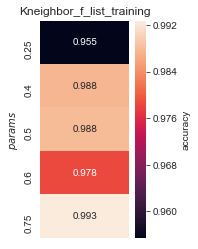

Kneighbor Bagging test accuracy with 0.45 and 0.75 is: 0.9876986160943106

 BAGGING CLASSIFIER WITH DECISION TREE
max_samples: [0.9943597  0.99423151 0.99294962 0.99333419 0.99282143]


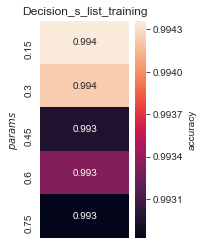

max_features: [0.93064992 0.98089988 0.98282272 0.99000128 0.99294962]


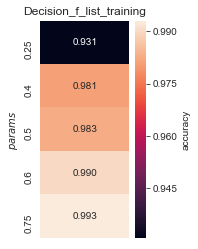

Decision Bagging test accuracy with 0.15 and 0.75 is: 0.9902614044079959




Random Forest Classifier 80/20 training accuracy:
[1.0, 1.0, 1.0]
Adaboost Classifier 80/20 training accuracy:
[1.0, 1.0, 1.0]
Gradient Boost Classifier 80/20 training accuracy:
[0.9982053582873991, 0.995128829637226, 0.9953852070247404]
Kneigher Bagging Classifier 80/20 training accuracy:
[0.9958979617997693, 0.99448788616844, 0.9910267914369952]
Decision Tree Bagging Classifier 80/20 training accuracy:
[0.9978207922061274, 0.9905140366619665, 0.9953852070247404]
Random Forest Classifier 80/20 test accuracy:         0.994020160601401
Adaboost Classifier 80/20 test accuracy:              0.9912865197334702
Gradient Boost Classifier 80/20 test accuracy:        0.9917990773962071
Kneighbor Bagging Classifier 80/20 test accuracy:     0.9921407825046984
Decision Tree Bagging Classifier 80/20 test accuracy: 0.988552878865539
Random Forest Classifier 80/20 test error:            0.0059798393985990295
Adaboost Classi

In [54]:
random_train_acc = []
adaboost_train_acc = []
gradient_train_acc = []
bagging_train_acc = []
decision_train_acc = []
random_test_acc = []
adaboost_test_acc = []
gradient_test_acc = []
bagging_test_acc = []
decision_test_acc = []
i = 1;
while i<4:
    #here we split the data again
    np.random.shuffle(X_and_Y) 
    X = X_and_Y[:, 0:-1]
    Y = X_and_Y[:, -1] 
    X_train_val = X[:int(0.8*len(X))]
    X_test = X[int(0.8*len(X)):]
    Y_train_val = Y[:int(0.8*len(Y))]
    Y_test = Y[int(0.8*len(Y)):]
    print(i)
    #then we run it on random forest
    random = RandomForestClassifier()
    print("\n RANDOM FOREST CLASSIFIER")
    #first grid search / cross validation for best parameter
    n_list = [1,25,50,100,150]
    parameters_random = {'n_estimators' : n_list}
    clf_random = GridSearchCV(random, parameters_random, cv=3)
    clf_random.fit(X_train_val, Y_train_val)
    #display result with heatmap
    print(clf_random.cv_results_['mean_test_score'])
    draw_heatmap(clf_random.cv_results_['mean_test_score'].reshape(len(n_list),1), "random_training", n_list)
    #choose the best parameter and train again
    random = RandomForestClassifier(n_estimators = clf_random.best_params_['n_estimators'])
    random = random.fit(X_train_val, Y_train_val)
    #calculate the test error
    test_predict = random.predict(X_test)
    test_acc = sum([test_predict[i] == Y_test[i] for i in range(len(Y_test))])/len(Y_test)
    train_predict = random.predict(X_train_val)
    train_acc = sum([train_predict[i] == Y_train_val[i] for i in range(len(Y_train_val))])/len(Y_train_val)
    print("random test accuracy with "+str(clf_random.best_params_['n_estimators'])+" is: " + str(test_acc))
    random_test_acc.append(test_acc)
    random_train_acc.append(train_acc)
    
    #run it with Adaboost
    dt = DecisionTreeClassifier() 
    adaboost = AdaBoostClassifier(base_estimator=dt)
    print("\n ADABOOST CLASSIFIER WITH DECISION TREE")
    #first grid search / cross validation for best parameter
    e_list = [10,60,120,200,300]
    parameters_adaboost = {'n_estimators' : e_list}
    clf_adaboost = GridSearchCV(adaboost, parameters_adaboost, cv=3)
    clf_adaboost.fit(X_train_val,Y_train_val)
    #display result with heatmap
    print(clf_adaboost.cv_results_['mean_test_score'])
    draw_heatmap(clf_adaboost.cv_results_['mean_test_score'].reshape(len(e_list),1), "adaboost_training", e_list)
    #choose the best parameter and train again
    adaboost = AdaBoostClassifier(base_estimator=dt, n_estimators=clf_adaboost.best_params_['n_estimators'])
    adaboost = adaboost.fit(X_train_val, Y_train_val)
    #calculate the test error
    test_predict = adaboost.predict(X_test)
    train_predict = adaboost.predict(X_train_val)
    train_acc = sum([train_predict[i] == Y_train_val[i] for i in range(len(Y_train_val))])/len(Y_train_val)
    test_acc = sum([test_predict[i] == Y_test[i] for i in range(len(Y_test))])/len(Y_test)
    print("Adaboost test accuracy with "+str(clf_adaboost.best_params_['n_estimators'])+" is: " + str(test_acc))
    adaboost_test_acc.append(test_acc)
    adaboost_train_acc.append(train_acc)
    
    #run it with gradient
    gradient = ensemble.GradientBoostingClassifier()
    print("\n GRADIENT BOOSTING CLASSIFIER")
    parameters_gradient = {'n_estimators': e_list}
    #first grid search / cross validation for best parameter
    clf_gradient = GridSearchCV(gradient, parameters_gradient, cv=3)
    clf_gradient.fit(X_train_val, Y_train_val)
    #display result with heatmap
    print(clf_gradient.cv_results_['mean_test_score'])
    draw_heatmap(clf_gradient.cv_results_['mean_test_score'].reshape(len(e_list),1), "gradient_training", e_list)
    #choose the best parameter and train again
    gradient = ensemble.GradientBoostingClassifier(n_estimators=clf_gradient.best_params_['n_estimators'])
    gradient = gradient.fit(X_train_val,Y_train_val)
    #calculate the test error
    test_predict = gradient.predict(X_test)
    test_acc = sum([test_predict[i] == Y_test[i] for i in range(len(Y_test))])/len(Y_test)
    train_predict = gradient.predict(X_train_val)
    train_acc = sum([train_predict[i] == Y_train_val[i] for i in range(len(Y_train_val))])/len(Y_train_val)
    print("Gradient test accuracy with "+str(clf_gradient.best_params_['n_estimators'])+" is: " + str(test_acc))
    gradient_test_acc.append(test_acc)
    gradient_train_acc.append(train_acc)
    
    #run it with Bagging Family with KNeighborClassifer
    bagging = BaggingClassifier(KNeighborsClassifier())
    print("\n BAGGING CLASSIFIER WITH KNEIGHBORS CLASSIFIER")
    s_list = [0.15,0.3,0.45,0.6,0.75]
    parameters_bagging = {'max_samples' : s_list}
    clf_bagging = GridSearchCV(bagging, parameters_bagging, cv=3)
    clf_bagging.fit(X_train_val, Y_train_val)
    print("max_samples: " + str(clf_bagging.cv_results_['mean_test_score']))
    draw_heatmap(clf_bagging.cv_results_['mean_test_score'].reshape(len(s_list),1),"Kneighbor_s_list_training", s_list)
    #choose the best parameter and train again for max_features
    bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=clf_bagging.best_params_['max_samples'])
    best_max_samples = clf_bagging.best_params_['max_samples']
    f_list = [0.25,0.4,0.5,0.6,0.75]
    parameters_bagging = {'max_features': f_list}
    clf_bagging = GridSearchCV(bagging, parameters_bagging, cv=3)
    clf_bagging.fit(X_train_val, Y_train_val)
    print("max_features: " + str(clf_bagging.cv_results_['mean_test_score']))
    draw_heatmap(clf_bagging.cv_results_['mean_test_score'].reshape(len(f_list),1),"Kneighbor_f_list_training", f_list)
    #choose the best parameter and train again for max_features
    bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=best_max_samples, 
                                max_features= clf_bagging.best_params_['max_features'])
    bagging = bagging.fit(X_train_val, Y_train_val)
    test_predict = bagging.predict(X_test)
    train_predict = bagging.predict(X_train_val)
    train_acc = sum([train_predict[i] == Y_train_val[i] for i in range(len(Y_train_val))])/len(Y_train_val)
    test_acc = sum([test_predict[i] == Y_test[i] for i in range(len(Y_test))])/len(Y_test)
    print("Kneighbor Bagging test accuracy with "+str(best_max_samples)+ 
          " and "+ str(clf_bagging.best_params_['max_features'])+" is: " + str(test_acc))
    bagging_test_acc.append(test_acc)
    bagging_train_acc.append(train_acc)
    
    #run it with Bagging Family with Decision tree
    decision = BaggingClassifier()
    parameters_decision = {'max_samples' : s_list}
    print("\n BAGGING CLASSIFIER WITH DECISION TREE")
    clf_decision = GridSearchCV(decision, parameters_decision, cv=3)
    clf_decision.fit(X_train_val, Y_train_val)
    print("max_samples: " + str(clf_decision.cv_results_['mean_test_score']))
    draw_heatmap(clf_decision.cv_results_['mean_test_score'].reshape(len(s_list),1),"Decision_s_list_training", s_list)
    #choose the best parameter and train again for max_features
    decision = BaggingClassifier(max_samples=clf_decision.best_params_['max_samples'])
    best_max_samples = clf_decision.best_params_['max_samples']
    parameters_decision = {'max_features': f_list}
    clf_decision = GridSearchCV(decision, parameters_decision, cv=3)
    clf_decision.fit(X_train_val, Y_train_val)
    print("max_features: " + str(clf_decision.cv_results_['mean_test_score']))
    draw_heatmap(clf_decision.cv_results_['mean_test_score'].reshape(len(f_list),1),"Decision_f_list_training", f_list)
    #choose the best parameter and train again for max_features
    decision = BaggingClassifier(max_samples=best_max_samples, 
                                max_features= clf_decision.best_params_['max_features'])
    decision = decision.fit(X_train_val, Y_train_val)
    test_predict = decision.predict(X_test)
    train_predict = decision.predict(X_train_val)
    train_acc = sum([train_predict[i] == Y_train_val[i] for i in range(len(Y_train_val))])/len(Y_train_val)
    test_acc = sum([test_predict[i] == Y_test[i] for i in range(len(Y_test))])/len(Y_test)
    print("Decision Bagging test accuracy with "+str(best_max_samples)+ 
          " and "+ str(clf_decision.best_params_['max_features'])+" is: " + str(test_acc))
    decision_test_acc.append(test_acc)
    decision_train_acc.append(train_acc)
    
    i = i+1;
    print("\n\n\n")
print("Random Forest Classifier 80/20 training accuracy:")
print(random_train_acc)
print("Adaboost Classifier 80/20 training accuracy:")
print(adaboost_train_acc)
print("Gradient Boost Classifier 80/20 training accuracy:")
print(gradient_train_acc)
print("Kneigher Bagging Classifier 80/20 training accuracy:")
print(bagging_train_acc)
print("Decision Tree Bagging Classifier 80/20 training accuracy:")
print(decision_train_acc)
print("Random Forest Classifier 80/20 test accuracy:         "+ str(sum(random_test_acc)/len(random_test_acc)))
print("Adaboost Classifier 80/20 test accuracy:              "+ str(sum(adaboost_test_acc)/len(adaboost_test_acc)))
print("Gradient Boost Classifier 80/20 test accuracy:        "+ str(sum(gradient_test_acc)/len(gradient_test_acc)))
print("Kneighbor Bagging Classifier 80/20 test accuracy:     "+ str(sum(bagging_test_acc)/len(bagging_test_acc)))
print("Decision Tree Bagging Classifier 80/20 test accuracy: "+ str(sum(decision_test_acc)/len(decision_test_acc)))
print("Random Forest Classifier 80/20 test error:            "+ str(1-sum(random_test_acc)/len(random_test_acc)))
print("Adaboost Classifier 80/20 test error:                 "+ str(1-sum(adaboost_test_acc)/len(adaboost_test_acc)))
print("Gradient Boost Classifier 80/20 test error:           "+ str(1-sum(gradient_test_acc)/len(gradient_test_acc)))
print("Kneighbor Bagging Classifier 80/20 test error:        "+ str(1-sum(bagging_test_acc)/len(bagging_test_acc)))
print("Decision Tree Bagging Classifier 80/20 test error:    "+ str(1-sum(decision_test_acc)/len(decision_test_acc)))

# 50/50 Split

1

 RANDOM FOREST CLASSIFIER
[0.98851518 0.99241181 0.99282199 0.9926169  0.99282199]


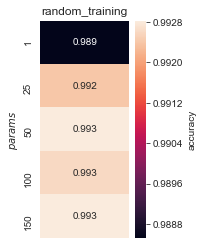

random test accuracy with 50 is: 0.9956931911402789

 ADABOOST CLASSIFIER WITH DECISION TREE
[0.99015587 0.99015587 0.99015587 0.99036095 0.98995078]


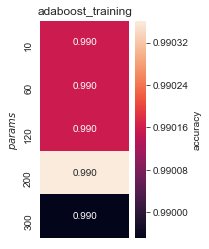

Adaboost test accuracy with 200 is: 0.9920016406890895

 GRADIENT BOOSTING CLASSIFIER
[0.99138638 0.99077112 0.99077112 0.99138638 0.9911813 ]


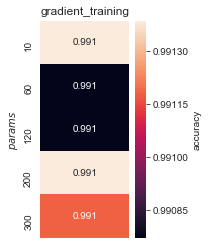

Gradient test accuracy with 10 is: 0.9950779327317474

 BAGGING CLASSIFIER WITH KNEIGHBORS CLASSIFIER
max_samples: [0.99282199 0.99282199 0.99302707 0.9926169  0.99282199]


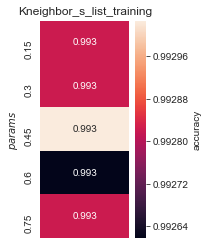

max_features: [0.88576702 0.98174733 0.98277276 0.99282199 0.98625923]


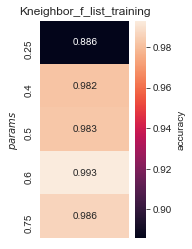

Kneighbor Bagging test accuracy with 0.45 and 0.6 is: 0.9942575881870386

 BAGGING CLASSIFIER WITH DECISION TREE
max_samples: [0.99220673 0.99282199 0.9926169  0.99159147 0.99302707]


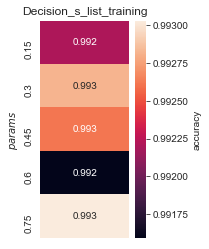

max_features: [0.94114028 0.988105   0.99015587 0.9911813  0.99159147]


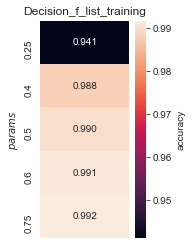

Decision Bagging test accuracy with 0.75 and 0.75 is: 0.9948728465955702




2

 RANDOM FOREST CLASSIFIER
[0.99241181 0.99466776 0.99528302 0.99528302 0.99528302]


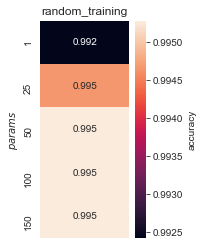

random test accuracy with 50 is: 0.992616899097621

 ADABOOST CLASSIFIER WITH DECISION TREE
[0.9926169  0.99241181 0.9926169  0.99220673 0.99302707]


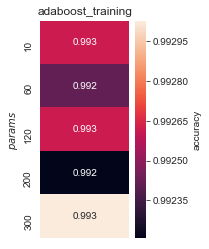

Adaboost test accuracy with 300 is: 0.9905660377358491

 GRADIENT BOOSTING CLASSIFIER
[0.99466776 0.99425759 0.99384742 0.99446267 0.99425759]


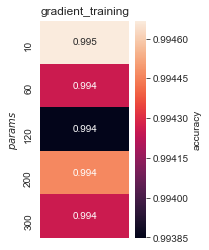

Gradient test accuracy with 10 is: 0.9922067268252666

 BAGGING CLASSIFIER WITH KNEIGHBORS CLASSIFIER
max_samples: [0.99425759 0.99425759 0.99425759 0.99425759 0.99446267]


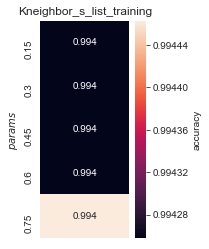

max_features: [0.89971288 0.97621001 0.98338802 0.99302707 0.99466776]


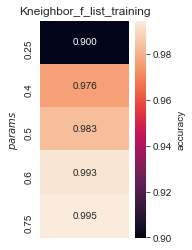

Kneighbor Bagging test accuracy with 0.75 and 0.75 is: 0.9883100902379

 BAGGING CLASSIFIER WITH DECISION TREE
max_samples: [0.99425759 0.99507793 0.99487285 0.99487285 0.99446267]


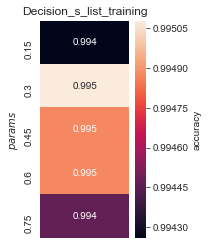

max_features: [0.9630845  0.99077112 0.97579984 0.99343724 0.99507793]


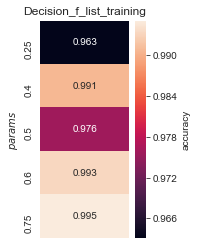

Decision Bagging test accuracy with 0.3 and 0.75 is: 0.9928219852337982




3

 RANDOM FOREST CLASSIFIER
[0.99015587 0.99364233 0.99364233 0.99364233 0.99343724]


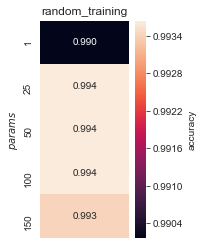

random test accuracy with 25 is: 0.9944626743232158

 ADABOOST CLASSIFIER WITH DECISION TREE
[0.9926169  0.99138638 0.99077112 0.99241181 0.99159147]


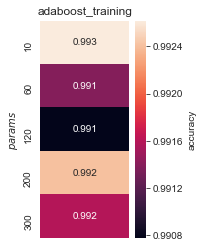

Adaboost test accuracy with 10 is: 0.9928219852337982

 GRADIENT BOOSTING CLASSIFIER
[0.9926169  0.99179655 0.99138638 0.99179655 0.99159147]


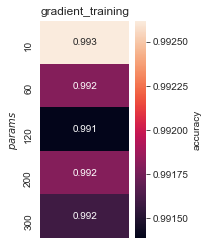

Gradient test accuracy with 10 is: 0.9938474159146842

 BAGGING CLASSIFIER WITH KNEIGHBORS CLASSIFIER
max_samples: [0.99200164 0.99241181 0.99302707 0.9926169  0.99302707]


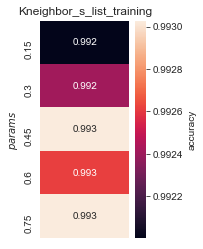

max_features: [0.93601313 0.98605414 0.98482363 0.99282199 0.98318294]


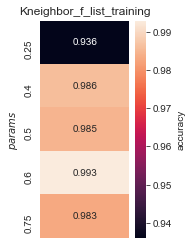

Kneighbor Bagging test accuracy with 0.45 and 0.6 is: 0.9928219852337982

 BAGGING CLASSIFIER WITH DECISION TREE
max_samples: [0.9926169  0.99323216 0.99364233 0.99384742 0.99282199]


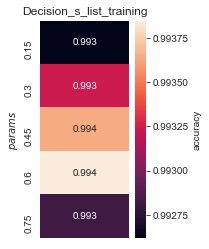

max_features: [0.90319934 0.9837982  0.98441345 0.9911813  0.9926169 ]


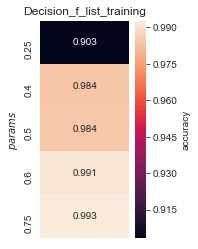

Decision Bagging test accuracy with 0.6 and 0.75 is: 0.9934372436423298




Random Forest Classifier 50/50 training accuracy:
[1.0, 0.9997949138638228, 1.0]
Adaboost Classifier 50/50 training accuracy:
[1.0, 1.0, 1.0]
Gradient Boost Classifier 50/50 training accuracy:
[0.9942575881870386, 0.9963084495488105, 0.9944626743232158]
Kneigher Bagging Classifier 50/50 training accuracy:
[0.993642329778507, 0.9958982772764561, 0.9942575881870386]
Decision Tree Bagging Classifier 50/50 training accuracy:
[0.9975389663658737, 0.9965135356849877, 0.9975389663658737]
Random Forest Classifier 50/50 test accuracy:         0.9942575881870385
Adaboost Classifier 50/50 test accuracy:              0.9917965545529123
Gradient Boost Classifier 50/50 test accuracy:        0.9937106918238993
Kneighbor Bagging Classifier 50/50 test accuracy:     0.9917965545529123
Decision Tree Bagging Classifier 50/50 test accuracy: 0.9937106918238993
Random Forest Classifier 50/50 test error:            0.00574241181296153

In [55]:
random_train_acc = []
adaboost_train_acc = []
gradient_train_acc = []
bagging_train_acc = []
decision_train_acc = []
random_test_acc = []
adaboost_test_acc = []
gradient_test_acc = []
bagging_test_acc = []
decision_test_acc = []
i = 1;
while i<4:
    #here we split the data again
    np.random.shuffle(X_and_Y) 
    X = X_and_Y[:, 0:-1]
    Y = X_and_Y[:, -1] 
    X_train_val = X[:int(0.5*len(X))]
    X_test = X[int(0.5*len(X)):]
    Y_train_val = Y[:int(0.5*len(Y))]
    Y_test = Y[int(0.5*len(Y)):]
    print(i)
    #then we run it on random forest
    random = RandomForestClassifier()
    print("\n RANDOM FOREST CLASSIFIER")
    #first grid search / cross validation for best parameter
    n_list = [1,25,50,100,150]
    parameters_random = {'n_estimators' : n_list}
    clf_random = GridSearchCV(random, parameters_random, cv=3)
    clf_random.fit(X_train_val, Y_train_val)
    #display result with heatmap
    print(clf_random.cv_results_['mean_test_score'])
    draw_heatmap(clf_random.cv_results_['mean_test_score'].reshape(len(n_list),1), "random_training", n_list)
    #choose the best parameter and train again
    random = RandomForestClassifier(n_estimators = clf_random.best_params_['n_estimators'])
    random = random.fit(X_train_val, Y_train_val)
    #calculate the test error
    test_predict = random.predict(X_test)
    test_acc = sum([test_predict[i] == Y_test[i] for i in range(len(Y_test))])/len(Y_test)
    train_predict = random.predict(X_train_val)
    train_acc = sum([train_predict[i] == Y_train_val[i] for i in range(len(Y_train_val))])/len(Y_train_val)
    print("random test accuracy with "+str(clf_random.best_params_['n_estimators'])+" is: " + str(test_acc))
    random_test_acc.append(test_acc)
    random_train_acc.append(train_acc)
    
    #run it with Adaboost
    dt = DecisionTreeClassifier() 
    adaboost = AdaBoostClassifier(base_estimator=dt)
    print("\n ADABOOST CLASSIFIER WITH DECISION TREE")
    #first grid search / cross validation for best parameter
    e_list = [10,60,120,200,300]
    parameters_adaboost = {'n_estimators' : e_list}
    clf_adaboost = GridSearchCV(adaboost, parameters_adaboost, cv=3)
    clf_adaboost.fit(X_train_val,Y_train_val)
    #display result with heatmap
    print(clf_adaboost.cv_results_['mean_test_score'])
    draw_heatmap(clf_adaboost.cv_results_['mean_test_score'].reshape(len(e_list),1), "adaboost_training", e_list)
    #choose the best parameter and train again
    adaboost = AdaBoostClassifier(base_estimator=dt, n_estimators=clf_adaboost.best_params_['n_estimators'])
    adaboost = adaboost.fit(X_train_val, Y_train_val)
    #calculate the test error
    test_predict = adaboost.predict(X_test)
    train_predict = adaboost.predict(X_train_val)
    train_acc = sum([train_predict[i] == Y_train_val[i] for i in range(len(Y_train_val))])/len(Y_train_val)
    test_acc = sum([test_predict[i] == Y_test[i] for i in range(len(Y_test))])/len(Y_test)
    print("Adaboost test accuracy with "+str(clf_adaboost.best_params_['n_estimators'])+" is: " + str(test_acc))
    adaboost_test_acc.append(test_acc)
    adaboost_train_acc.append(train_acc)
    
    #run it with gradient
    gradient = ensemble.GradientBoostingClassifier()
    print("\n GRADIENT BOOSTING CLASSIFIER")
    parameters_gradient = {'n_estimators': e_list}
    #first grid search / cross validation for best parameter
    clf_gradient = GridSearchCV(gradient, parameters_gradient, cv=3)
    clf_gradient.fit(X_train_val, Y_train_val)
    #display result with heatmap
    print(clf_gradient.cv_results_['mean_test_score'])
    draw_heatmap(clf_gradient.cv_results_['mean_test_score'].reshape(len(e_list),1), "gradient_training", e_list)
    #choose the best parameter and train again
    gradient = ensemble.GradientBoostingClassifier(n_estimators=clf_gradient.best_params_['n_estimators'])
    gradient = gradient.fit(X_train_val,Y_train_val)
    #calculate the test error
    test_predict = gradient.predict(X_test)
    test_acc = sum([test_predict[i] == Y_test[i] for i in range(len(Y_test))])/len(Y_test)
    train_predict = gradient.predict(X_train_val)
    train_acc = sum([train_predict[i] == Y_train_val[i] for i in range(len(Y_train_val))])/len(Y_train_val)
    print("Gradient test accuracy with "+str(clf_gradient.best_params_['n_estimators'])+" is: " + str(test_acc))
    gradient_test_acc.append(test_acc)
    gradient_train_acc.append(train_acc)
    
    #run it with Bagging Family with KNeighborClassifer
    bagging = BaggingClassifier(KNeighborsClassifier())
    print("\n BAGGING CLASSIFIER WITH KNEIGHBORS CLASSIFIER")
    s_list = [0.15,0.3,0.45,0.6,0.75]
    parameters_bagging = {'max_samples' : s_list}
    clf_bagging = GridSearchCV(bagging, parameters_bagging, cv=3)
    clf_bagging.fit(X_train_val, Y_train_val)
    print("max_samples: " + str(clf_bagging.cv_results_['mean_test_score']))
    draw_heatmap(clf_bagging.cv_results_['mean_test_score'].reshape(len(s_list),1),"Kneighbor_s_list_training", s_list)
    #choose the best parameter and train again for max_features
    bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=clf_bagging.best_params_['max_samples'])
    best_max_samples = clf_bagging.best_params_['max_samples']
    f_list = [0.25,0.4,0.5,0.6,0.75]
    parameters_bagging = {'max_features': f_list}
    clf_bagging = GridSearchCV(bagging, parameters_bagging, cv=3)
    clf_bagging.fit(X_train_val, Y_train_val)
    print("max_features: " + str(clf_bagging.cv_results_['mean_test_score']))
    draw_heatmap(clf_bagging.cv_results_['mean_test_score'].reshape(len(f_list),1),"Kneighbor_f_list_training", f_list)
    #choose the best parameter and train again for max_features
    bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=best_max_samples, 
                                max_features= clf_bagging.best_params_['max_features'])
    bagging = bagging.fit(X_train_val, Y_train_val)
    test_predict = bagging.predict(X_test)
    train_predict = bagging.predict(X_train_val)
    train_acc = sum([train_predict[i] == Y_train_val[i] for i in range(len(Y_train_val))])/len(Y_train_val)
    test_acc = sum([test_predict[i] == Y_test[i] for i in range(len(Y_test))])/len(Y_test)
    print("Kneighbor Bagging test accuracy with "+str(best_max_samples)+ 
          " and "+ str(clf_bagging.best_params_['max_features'])+" is: " + str(test_acc))
    bagging_test_acc.append(test_acc)
    bagging_train_acc.append(train_acc)
    
    #run it with Bagging Family with Decision tree
    decision = BaggingClassifier()
    parameters_decision = {'max_samples' : s_list}
    print("\n BAGGING CLASSIFIER WITH DECISION TREE")
    clf_decision = GridSearchCV(decision, parameters_decision, cv=3)
    clf_decision.fit(X_train_val, Y_train_val)
    print("max_samples: " + str(clf_decision.cv_results_['mean_test_score']))
    draw_heatmap(clf_decision.cv_results_['mean_test_score'].reshape(len(s_list),1),"Decision_s_list_training", s_list)
    #choose the best parameter and train again for max_features
    decision = BaggingClassifier(max_samples=clf_decision.best_params_['max_samples'])
    best_max_samples = clf_decision.best_params_['max_samples']
    parameters_decision = {'max_features': f_list}
    clf_decision = GridSearchCV(decision, parameters_decision, cv=3)
    clf_decision.fit(X_train_val, Y_train_val)
    print("max_features: " + str(clf_decision.cv_results_['mean_test_score']))
    draw_heatmap(clf_decision.cv_results_['mean_test_score'].reshape(len(f_list),1),"Decision_f_list_training", f_list)
    #choose the best parameter and train again for max_features
    decision = BaggingClassifier(max_samples=best_max_samples, 
                                max_features= clf_decision.best_params_['max_features'])
    decision = decision.fit(X_train_val, Y_train_val)
    test_predict = decision.predict(X_test)
    train_predict = decision.predict(X_train_val)
    train_acc = sum([train_predict[i] == Y_train_val[i] for i in range(len(Y_train_val))])/len(Y_train_val)
    test_acc = sum([test_predict[i] == Y_test[i] for i in range(len(Y_test))])/len(Y_test)
    print("Decision Bagging test accuracy with "+str(best_max_samples)+ 
          " and "+ str(clf_decision.best_params_['max_features'])+" is: " + str(test_acc))
    decision_test_acc.append(test_acc)
    decision_train_acc.append(train_acc)
    
    i = i+1;
    print("\n\n\n")
print("Random Forest Classifier 50/50 training accuracy:")
print(random_train_acc)
print("Adaboost Classifier 50/50 training accuracy:")
print(adaboost_train_acc)
print("Gradient Boost Classifier 50/50 training accuracy:")
print(gradient_train_acc)
print("Kneigher Bagging Classifier 50/50 training accuracy:")
print(bagging_train_acc)
print("Decision Tree Bagging Classifier 50/50 training accuracy:")
print(decision_train_acc)
print("Random Forest Classifier 50/50 test accuracy:         "+ str(sum(random_test_acc)/len(random_test_acc)))
print("Adaboost Classifier 50/50 test accuracy:              "+ str(sum(adaboost_test_acc)/len(adaboost_test_acc)))
print("Gradient Boost Classifier 50/50 test accuracy:        "+ str(sum(gradient_test_acc)/len(gradient_test_acc)))
print("Kneighbor Bagging Classifier 50/50 test accuracy:     "+ str(sum(bagging_test_acc)/len(bagging_test_acc)))
print("Decision Tree Bagging Classifier 50/50 test accuracy: "+ str(sum(decision_test_acc)/len(decision_test_acc)))
print("Random Forest Classifier 50/50 test error:            "+ str(1-sum(random_test_acc)/len(random_test_acc)))
print("Adaboost Classifier 50/50 test error:                 "+ str(1-sum(adaboost_test_acc)/len(adaboost_test_acc)))
print("Gradient Boost Classifier 50/50 test error:           "+ str(1-sum(gradient_test_acc)/len(gradient_test_acc)))
print("Kneighbor Bagging Classifier 50/50 test error:        "+ str(1-sum(bagging_test_acc)/len(bagging_test_acc)))
print("Decision Tree Bagging Classifier 50/50 test error:    "+ str(1-sum(decision_test_acc)/len(decision_test_acc)))

# 20/80 Split

1

 RANDOM FOREST CLASSIFIER
[0.98       0.99076923 0.99128205 0.99076923 0.99128205]


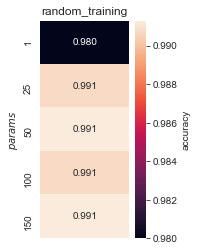

random test accuracy with 50 is: 0.9938477313509356

 ADABOOST CLASSIFIER WITH DECISION TREE
[0.98871795 0.98820513 0.98871795 0.98820513 0.98871795]


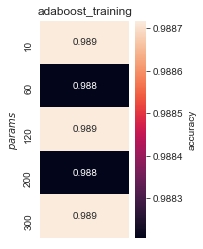

Adaboost test accuracy with 10 is: 0.9910279415534479

 GRADIENT BOOSTING CLASSIFIER
[0.99128205 0.98923077 0.98820513 0.98820513 0.98923077]


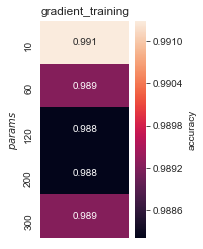

Gradient test accuracy with 10 is: 0.9924378364521917

 BAGGING CLASSIFIER WITH KNEIGHBORS CLASSIFIER
max_samples: [0.98871795 0.99128205 0.99179487 0.99282051 0.99282051]


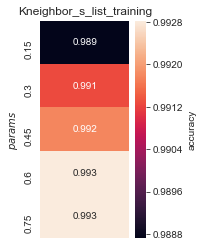

max_features: [0.8574359  0.94153846 0.97589744 0.98666667 0.96666667]


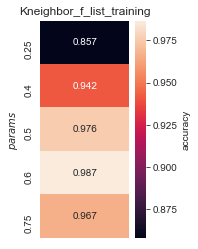

Kneighbor Bagging test accuracy with 0.6 and 0.6 is: 0.9738528582414765

 BAGGING CLASSIFIER WITH DECISION TREE
max_samples: [0.99179487 0.99230769 0.99282051 0.99025641 0.99076923]


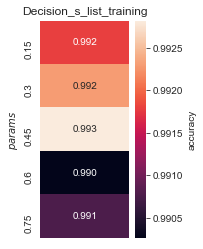

max_features: [0.93692308 0.98205128 0.97076923 0.98820513 0.99076923]


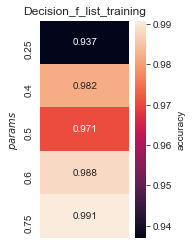

Decision Bagging test accuracy with 0.45 and 0.75 is: 0.9925660087157139




2

 RANDOM FOREST CLASSIFIER
[0.98410256 0.99179487 0.99128205 0.99179487 0.99179487]


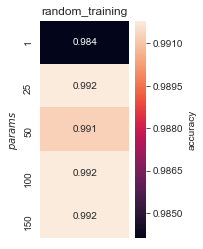

random test accuracy with 25 is: 0.9939759036144579

 ADABOOST CLASSIFIER WITH DECISION TREE
[0.98410256 0.98512821 0.98358974 0.98564103 0.98358974]


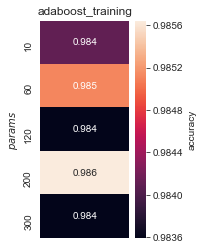

Adaboost test accuracy with 200 is: 0.9897462189182261

 GRADIENT BOOSTING CLASSIFIER
[0.98871795 0.98871795 0.98820513 0.98820513 0.98820513]


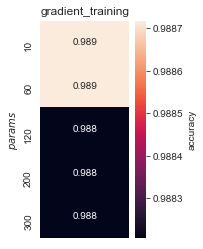

Gradient test accuracy with 10 is: 0.9937195590874135

 BAGGING CLASSIFIER WITH KNEIGHBORS CLASSIFIER
max_samples: [0.99128205 0.99179487 0.99282051 0.99282051 0.99282051]


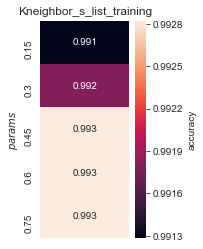

max_features: [0.90512821 0.99179487 0.96820513 0.98923077 0.98923077]


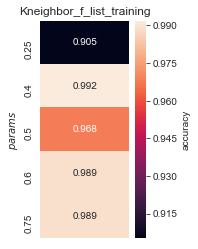

Kneighbor Bagging test accuracy with 0.45 and 0.4 is: 0.9312996667521148

 BAGGING CLASSIFIER WITH DECISION TREE
max_samples: [0.99179487 0.99179487 0.99179487 0.98974359 0.99076923]


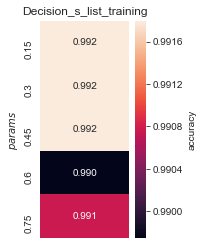

max_features: [0.90153846 0.97179487 0.97589744 0.99230769 0.97794872]


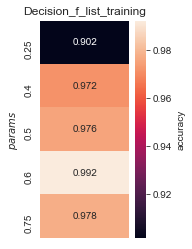

Decision Bagging test accuracy with 0.15 and 0.6 is: 0.9932068700333248




3

 RANDOM FOREST CLASSIFIER
[0.98512821 0.99179487 0.99076923 0.99076923 0.99076923]


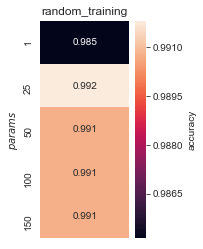

random test accuracy with 25 is: 0.993335042296847

 ADABOOST CLASSIFIER WITH DECISION TREE
[0.99076923 0.99076923 0.99076923 0.99025641 0.99076923]


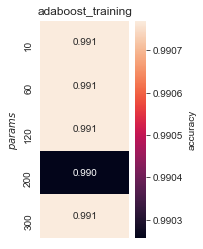

Adaboost test accuracy with 10 is: 0.990387080235837

 GRADIENT BOOSTING CLASSIFIER
[0.99384615 0.99076923 0.99179487 0.99128205 0.99179487]


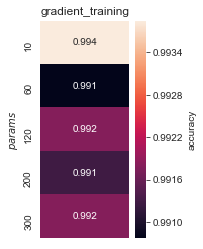

Gradient test accuracy with 10 is: 0.993335042296847

 BAGGING CLASSIFIER WITH KNEIGHBORS CLASSIFIER
max_samples: [0.98820513 0.99025641 0.99128205 0.99128205 0.99179487]


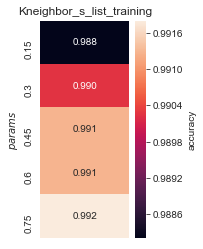

max_features: [0.95435897 0.94307692 0.98153846 0.99025641 0.98      ]


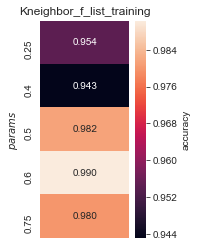

Kneighbor Bagging test accuracy with 0.75 and 0.6 is: 0.9943604204050244

 BAGGING CLASSIFIER WITH DECISION TREE
max_samples: [0.99076923 0.99076923 0.98820513 0.99333333 0.98974359]


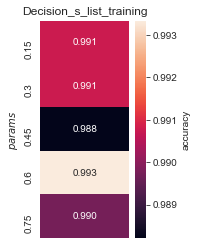

max_features: [0.93692308 0.97948718 0.96615385 0.99179487 0.98564103]


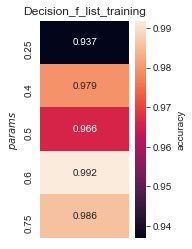

Decision Bagging test accuracy with 0.6 and 0.6 is: 0.9930786977698026




Random Forest Classifier 20/80 training accuracy:
[1.0, 1.0, 1.0]
Adaboost Classifier 20/80 training accuracy:
[1.0, 1.0, 1.0]
Gradient Boost Classifier 20/80 training accuracy:
[0.9958974358974358, 0.9943589743589744, 0.9953846153846154]
Kneigher Bagging Classifier 20/80 training accuracy:
[0.9912820512820513, 0.9620512820512821, 0.9923076923076923]
Decision Tree Bagging Classifier 20/80 training accuracy:
[0.9974358974358974, 0.9917948717948718, 0.9958974358974358]
Random Forest Classifier 20/80 test accuracy:         0.9937195590874136
Adaboost Classifier 20/80 test accuracy:              0.9903870802358371
Gradient Boost Classifier 20/80 test accuracy:        0.993164145945484
Kneighbor Bagging Classifier 20/80 test accuracy:     0.9665043151328719
Decision Tree Bagging Classifier 20/80 test accuracy: 0.9929505255062804
Random Forest Classifier 20/80 test error:            0.006280440912586394
Adaboost Class

In [56]:
random_train_acc = []
adaboost_train_acc = []
gradient_train_acc = []
bagging_train_acc = []
decision_train_acc = []
random_test_acc = []
adaboost_test_acc = []
gradient_test_acc = []
bagging_test_acc = []
decision_test_acc = []
i = 1;
while i<4:
    #here we split the data again
    np.random.shuffle(X_and_Y) 
    X = X_and_Y[:, 0:-1]
    Y = X_and_Y[:, -1] 
    X_train_val = X[:int(0.2*len(X))]
    X_test = X[int(0.2*len(X)):]
    Y_train_val = Y[:int(0.2*len(Y))]
    Y_test = Y[int(0.2*len(Y)):]
    print(i)
    #then we run it on random forest
    random = RandomForestClassifier()
    print("\n RANDOM FOREST CLASSIFIER")
    #first grid search / cross validation for best parameter
    n_list = [1,25,50,100,150]
    parameters_random = {'n_estimators' : n_list}
    clf_random = GridSearchCV(random, parameters_random, cv=3)
    clf_random.fit(X_train_val, Y_train_val)
    #display result with heatmap
    print(clf_random.cv_results_['mean_test_score'])
    draw_heatmap(clf_random.cv_results_['mean_test_score'].reshape(len(n_list),1), "random_training", n_list)
    #choose the best parameter and train again
    random = RandomForestClassifier(n_estimators = clf_random.best_params_['n_estimators'])
    random = random.fit(X_train_val, Y_train_val)
    #calculate the test error
    test_predict = random.predict(X_test)
    test_acc = sum([test_predict[i] == Y_test[i] for i in range(len(Y_test))])/len(Y_test)
    train_predict = random.predict(X_train_val)
    train_acc = sum([train_predict[i] == Y_train_val[i] for i in range(len(Y_train_val))])/len(Y_train_val)
    print("random test accuracy with "+str(clf_random.best_params_['n_estimators'])+" is: " + str(test_acc))
    random_test_acc.append(test_acc)
    random_train_acc.append(train_acc)
    
    #run it with Adaboost
    dt = DecisionTreeClassifier() 
    adaboost = AdaBoostClassifier(base_estimator=dt)
    print("\n ADABOOST CLASSIFIER WITH DECISION TREE")
    #first grid search / cross validation for best parameter
    e_list = [10,60,120,200,300]
    parameters_adaboost = {'n_estimators' : e_list}
    clf_adaboost = GridSearchCV(adaboost, parameters_adaboost, cv=3)
    clf_adaboost.fit(X_train_val,Y_train_val)
    #display result with heatmap
    print(clf_adaboost.cv_results_['mean_test_score'])
    draw_heatmap(clf_adaboost.cv_results_['mean_test_score'].reshape(len(e_list),1), "adaboost_training", e_list)
    #choose the best parameter and train again
    adaboost = AdaBoostClassifier(base_estimator=dt, n_estimators=clf_adaboost.best_params_['n_estimators'])
    adaboost = adaboost.fit(X_train_val, Y_train_val)
    #calculate the test error
    test_predict = adaboost.predict(X_test)
    train_predict = adaboost.predict(X_train_val)
    train_acc = sum([train_predict[i] == Y_train_val[i] for i in range(len(Y_train_val))])/len(Y_train_val)
    test_acc = sum([test_predict[i] == Y_test[i] for i in range(len(Y_test))])/len(Y_test)
    print("Adaboost test accuracy with "+str(clf_adaboost.best_params_['n_estimators'])+" is: " + str(test_acc))
    adaboost_test_acc.append(test_acc)
    adaboost_train_acc.append(train_acc)
    
    #run it with gradient
    gradient = ensemble.GradientBoostingClassifier()
    print("\n GRADIENT BOOSTING CLASSIFIER")
    parameters_gradient = {'n_estimators': e_list}
    #first grid search / cross validation for best parameter
    clf_gradient = GridSearchCV(gradient, parameters_gradient, cv=3)
    clf_gradient.fit(X_train_val, Y_train_val)
    #display result with heatmap
    print(clf_gradient.cv_results_['mean_test_score'])
    draw_heatmap(clf_gradient.cv_results_['mean_test_score'].reshape(len(e_list),1), "gradient_training", e_list)
    #choose the best parameter and train again
    gradient = ensemble.GradientBoostingClassifier(n_estimators=clf_gradient.best_params_['n_estimators'])
    gradient = gradient.fit(X_train_val,Y_train_val)
    #calculate the test error
    test_predict = gradient.predict(X_test)
    test_acc = sum([test_predict[i] == Y_test[i] for i in range(len(Y_test))])/len(Y_test)
    train_predict = gradient.predict(X_train_val)
    train_acc = sum([train_predict[i] == Y_train_val[i] for i in range(len(Y_train_val))])/len(Y_train_val)
    print("Gradient test accuracy with "+str(clf_gradient.best_params_['n_estimators'])+" is: " + str(test_acc))
    gradient_test_acc.append(test_acc)
    gradient_train_acc.append(train_acc)
    
    #run it with Bagging Family with KNeighborClassifer
    bagging = BaggingClassifier(KNeighborsClassifier())
    print("\n BAGGING CLASSIFIER WITH KNEIGHBORS CLASSIFIER")
    s_list = [0.15,0.3,0.45,0.6,0.75]
    parameters_bagging = {'max_samples' : s_list}
    clf_bagging = GridSearchCV(bagging, parameters_bagging, cv=3)
    clf_bagging.fit(X_train_val, Y_train_val)
    print("max_samples: " + str(clf_bagging.cv_results_['mean_test_score']))
    draw_heatmap(clf_bagging.cv_results_['mean_test_score'].reshape(len(s_list),1),"Kneighbor_s_list_training", s_list)
    #choose the best parameter and train again for max_features
    bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=clf_bagging.best_params_['max_samples'])
    best_max_samples = clf_bagging.best_params_['max_samples']
    f_list = [0.25,0.4,0.5,0.6,0.75]
    parameters_bagging = {'max_features': f_list}
    clf_bagging = GridSearchCV(bagging, parameters_bagging, cv=3)
    clf_bagging.fit(X_train_val, Y_train_val)
    print("max_features: " + str(clf_bagging.cv_results_['mean_test_score']))
    draw_heatmap(clf_bagging.cv_results_['mean_test_score'].reshape(len(f_list),1),"Kneighbor_f_list_training", f_list)
    #choose the best parameter and train again for max_features
    bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=best_max_samples, 
                                max_features= clf_bagging.best_params_['max_features'])
    bagging = bagging.fit(X_train_val, Y_train_val)
    test_predict = bagging.predict(X_test)
    train_predict = bagging.predict(X_train_val)
    train_acc = sum([train_predict[i] == Y_train_val[i] for i in range(len(Y_train_val))])/len(Y_train_val)
    test_acc = sum([test_predict[i] == Y_test[i] for i in range(len(Y_test))])/len(Y_test)
    print("Kneighbor Bagging test accuracy with "+str(best_max_samples)+ 
          " and "+ str(clf_bagging.best_params_['max_features'])+" is: " + str(test_acc))
    bagging_test_acc.append(test_acc)
    bagging_train_acc.append(train_acc)
    
    #run it with Bagging Family with Decision tree
    decision = BaggingClassifier()
    parameters_decision = {'max_samples' : s_list}
    print("\n BAGGING CLASSIFIER WITH DECISION TREE")
    clf_decision = GridSearchCV(decision, parameters_decision, cv=3)
    clf_decision.fit(X_train_val, Y_train_val)
    print("max_samples: " + str(clf_decision.cv_results_['mean_test_score']))
    draw_heatmap(clf_decision.cv_results_['mean_test_score'].reshape(len(s_list),1),"Decision_s_list_training", s_list)
    #choose the best parameter and train again for max_features
    decision = BaggingClassifier(max_samples=clf_decision.best_params_['max_samples'])
    best_max_samples = clf_decision.best_params_['max_samples']
    parameters_decision = {'max_features': f_list}
    clf_decision = GridSearchCV(decision, parameters_decision, cv=3)
    clf_decision.fit(X_train_val, Y_train_val)
    print("max_features: " + str(clf_decision.cv_results_['mean_test_score']))
    draw_heatmap(clf_decision.cv_results_['mean_test_score'].reshape(len(f_list),1),"Decision_f_list_training", f_list)
    #choose the best parameter and train again for max_features
    decision = BaggingClassifier(max_samples=best_max_samples, 
                                max_features= clf_decision.best_params_['max_features'])
    decision = decision.fit(X_train_val, Y_train_val)
    test_predict = decision.predict(X_test)
    train_predict = decision.predict(X_train_val)
    train_acc = sum([train_predict[i] == Y_train_val[i] for i in range(len(Y_train_val))])/len(Y_train_val)
    test_acc = sum([test_predict[i] == Y_test[i] for i in range(len(Y_test))])/len(Y_test)
    print("Decision Bagging test accuracy with "+str(best_max_samples)+ 
          " and "+ str(clf_decision.best_params_['max_features'])+" is: " + str(test_acc))
    decision_test_acc.append(test_acc)
    decision_train_acc.append(train_acc)
    
    i = i+1;
    print("\n\n\n")
print("Random Forest Classifier 20/80 training accuracy:")
print(random_train_acc)
print("Adaboost Classifier 20/80 training accuracy:")
print(adaboost_train_acc)
print("Gradient Boost Classifier 20/80 training accuracy:")
print(gradient_train_acc)
print("Kneigher Bagging Classifier 20/80 training accuracy:")
print(bagging_train_acc)
print("Decision Tree Bagging Classifier 20/80 training accuracy:")
print(decision_train_acc)
print("Random Forest Classifier 20/80 test accuracy:         "+ str(sum(random_test_acc)/len(random_test_acc)))
print("Adaboost Classifier 20/80 test accuracy:              "+ str(sum(adaboost_test_acc)/len(adaboost_test_acc)))
print("Gradient Boost Classifier 20/80 test accuracy:        "+ str(sum(gradient_test_acc)/len(gradient_test_acc)))
print("Kneighbor Bagging Classifier 20/80 test accuracy:     "+ str(sum(bagging_test_acc)/len(bagging_test_acc)))
print("Decision Tree Bagging Classifier 20/80 test accuracy: "+ str(sum(decision_test_acc)/len(decision_test_acc)))
print("Random Forest Classifier 20/80 test error:            "+ str(1-sum(random_test_acc)/len(random_test_acc)))
print("Adaboost Classifier 20/80 test error:                 "+ str(1-sum(adaboost_test_acc)/len(adaboost_test_acc)))
print("Gradient Boost Classifier 20/80 test error:           "+ str(1-sum(gradient_test_acc)/len(gradient_test_acc)))
print("Kneighbor Bagging Classifier 20/80 test error:        "+ str(1-sum(bagging_test_acc)/len(bagging_test_acc)))
print("Decision Tree Bagging Classifier 20/80 test error:    "+ str(1-sum(decision_test_acc)/len(decision_test_acc)))